In [1]:
import json
import pandas as pd
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [2]:
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [3]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
"xxbos ' how do we treat the little people , joan ? ' i asked . and she said , ' why , we treat them better . we only s -- t on people at our level or higher . '",0
"xxbos tv showdown expected as ' sleepy hollow ' debuts tonight against hbo 's ' ichabod , ' tnt 's ' headless xxunk , ' showtime 's ' cloaked rider '",1
"xxbos ' you did the best you could , ' says iron man action figure voiced by despondent toys ' r ' us ceo packing up office",1
xxbos newt gingrich : ' it 's an honor to address a crowd that shares my utterly bizarre and unhealthy obsession with hillary clinton ',1


In [4]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('learn1_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


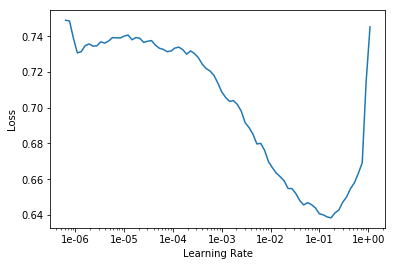

In [5]:
learn.lr_find()
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(1, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

epoch,train_loss,valid_loss,accuracy,time
0,0.530274,0.428358,0.805488,04:21


Better model found at epoch 0 with accuracy value: 0.8054876923561096.


In [7]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])
learn.save_encoder("learn0_clas_enc")

epoch,train_loss,valid_loss,accuracy,time
0,0.305915,0.238700,0.898891,13:00


Better model found at epoch 0 with accuracy value: 0.8988912105560303.


In [8]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

epoch,train_loss,valid_loss,accuracy,time
0,0.256126,0.222245,0.906972,13:03
1,0.240364,0.240739,0.900019,14:46
2,0.222044,0.328980,0.865251,13:22
3,0.215266,0.374131,0.865251,13:42
4,0.210453,0.499379,0.801729,14:25
5,0.191175,0.378148,0.844014,15:32
6,0.205823,0.377707,0.855102,17:49
7,0.163929,0.415936,0.843075,24:18
8,0.193239,0.453186,0.832738,25:25
9,0.157824,0.463357,0.841195,26:15


Better model found at epoch 0 with accuracy value: 0.906972348690033.


In [9]:
learn.save_encoder("learn_clas1_enc")

In [22]:
learn.predict("Man Annoyed At Being Mistaken For Employee Just Because He Driving Forklift Through Store")

(Category 1, tensor(1), tensor([0.2970, 0.7030]))